In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('family_data.csv')
df.head()

,family_id,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,n_people
0,0,52,38,12,82,33,75,64,76,10,28,4
1,1,26,4,82,5,11,47,38,6,66,61,4
2,2,100,54,25,12,27,82,10,89,80,33,3
3,3,2,95,1,96,32,6,40,31,9,59,2
4,4,53,1,47,93,26,3,46,16,42,39,4


In [15]:
print(f' Total number of people: {df["n_people"].sum()}')

print(f' Total number of familes: {df["family_id"].count()}')

print(f' Avg number of people per family: {df["n_people"].sum()/df["family_id"].count()}')

 Total number of people: 21003
 Total number of familes: 5000
 Avg number of people per family: 4.2006


In [30]:
# Creating list to run the loop for the choices' medians
choices = []
for i in df.columns[1:11]:
    choices.append(i)

In [31]:
# Visualizing the choices' medians
for i in choices:
    print(f'{i} median: {df[i].median()}')

choice_0 median: 38.0
choice_1 median: 38.0
choice_2 median: 38.0
choice_3 median: 39.0
choice_4 median: 39.0
choice_5 median: 40.0
choice_6 median: 39.0
choice_7 median: 39.0
choice_8 median: 39.0
choice_9 median: 39.0


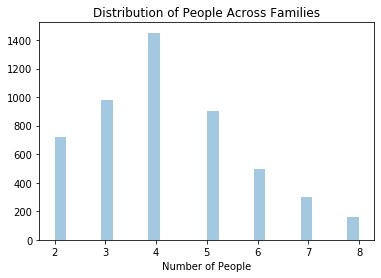

In [32]:
# How is the distribution of people among the 5000 families ?

plt.figure()

sns.distplot(df['n_people'], kde=False)
plt.title('Distribution of People Across Families')
plt.xlabel('Number of People')
plt.show()

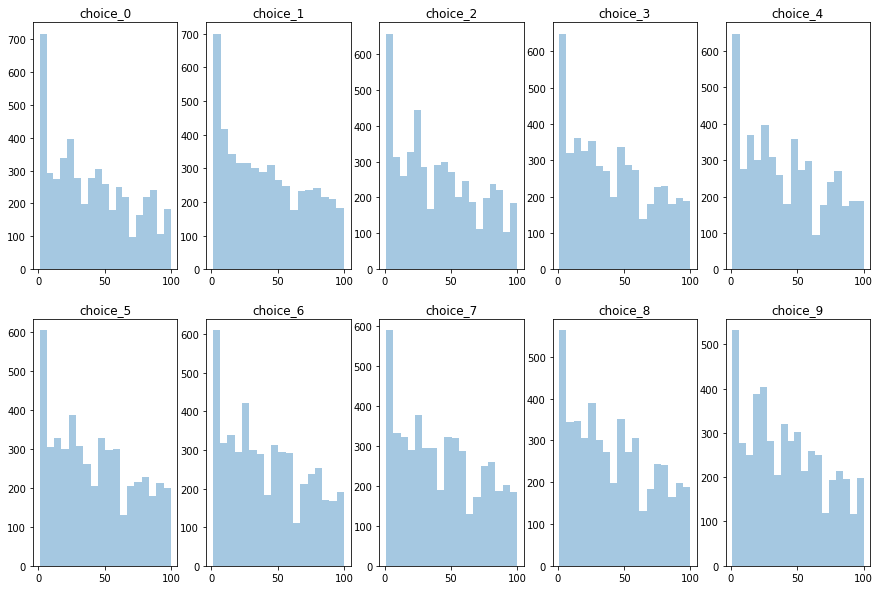

In [33]:
# Distribution of the families' preferred dates 

plt.figure(figsize=(15,10))

counter = 1
for i in choices:
    plt.subplot(2,5,counter)
    sns.distplot(df[i], kde=False)
    plt.title(i)
    plt.xlabel(" ")
    counter += 1

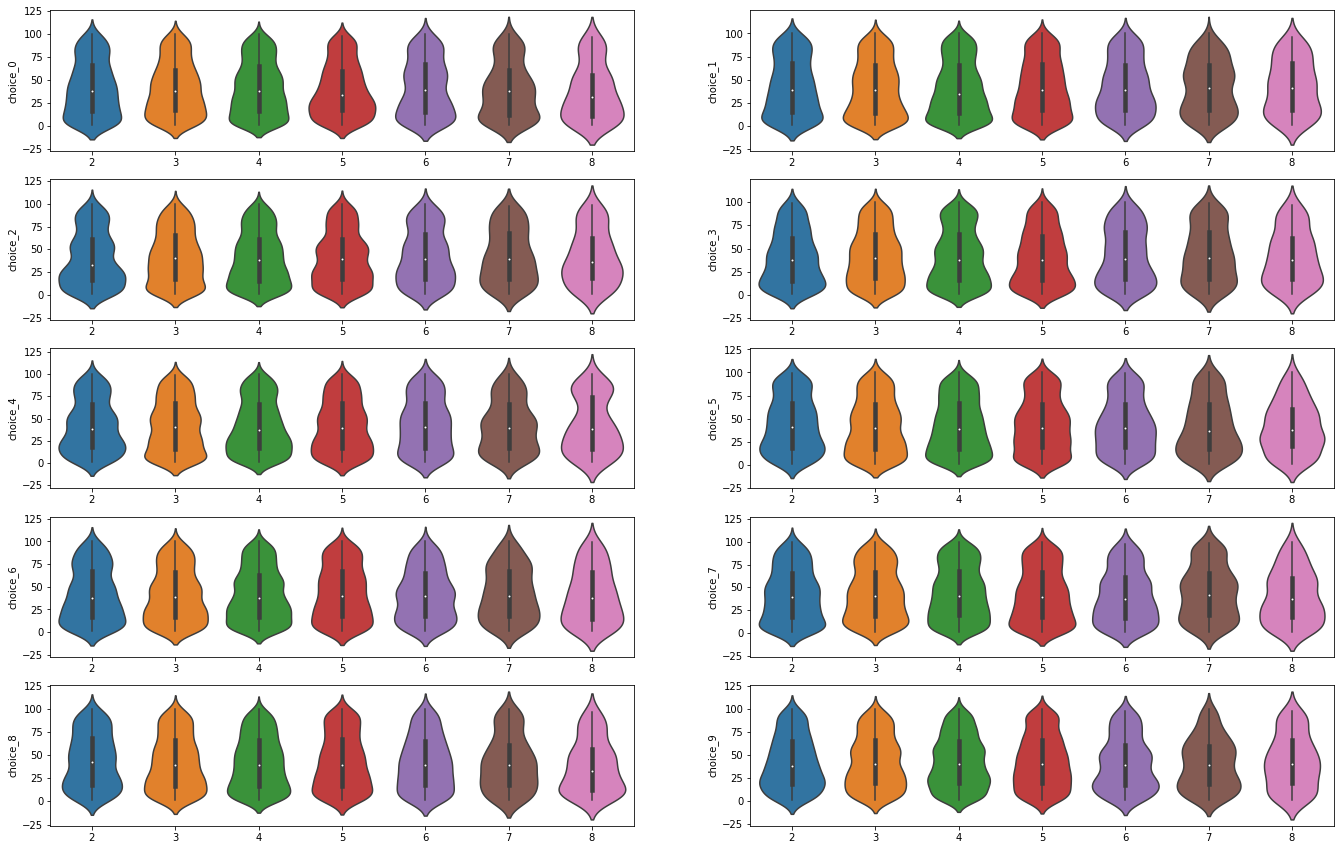

In [34]:
# Distribution of the families' preferred dates by number of family members


plt.figure(figsize=(23,15))

counter = 1
for i in choices:
    plt.subplot(5,2,counter)
    sns.violinplot(x=df['n_people'], y=df[i])
    plt.xlabel(" ")
    counter += 1

In [59]:
# Simulation of accounting cost - Maximum capacity  

acost1 = (300-125) / 400.0 * 300**(0.5)


# Simulation of accounting cost - Minimum capacity

acost2 = (125-125) / 400.0 * 125**(0.5)

# Simulation of accounting cost - Evenly distributed (Total people/number of days)

acost3 = (210-125) / 400.0 * 210**(0.5)

print(f' Maximum capacity: {acost1}')
print(f' Minimum capacity: {acost2}')
print(f' Minimum capacity: {acost3}')

 Maximum capacity: 7.577722283113839
 Minimum capacity: 0.0
 Minimum capacity: 3.0794175585652557


In [70]:
# Simulation of accounting cost - Worst Choice 

acost4 = (300-125) / 400.0 * 300**(0.5 + abs(300-125)/50)

# Simulation of accounting cost - Minimizing the penalty #1

acost5 = (275-125) / 400.0 * 275**(0.5 + abs(275-300)/50)

# Simulation of accounting cost - Minimizing the penalty #2

acost6 = (250-125) / 400.0 * 250**(0.5 + abs(250-275)/50)

# Simulation of accounting cost - Minimizing the penalty #3

acost7 = (225-125) / 400.0 * 225**(0.5 + abs(225-250)/50)

# Simulation of accounting cost - Minimizing the penalty #4

acost8 = (225-125) / 400.0 * 225**(0.5 + abs(225-250)/50)

# Simulation of accounting cost - Minimizing the penalty #5

acost9 = (200-125) / 400.0 * 200**(0.5 + abs(200-225)/50)

# Simulation of accounting cost - Minimizing the penalty #6

acost10 = (175-125) / 400.0 * 200**(0.5 + abs(175-200)/50)

# Simulation of accounting cost - Minimizing the penalty #7

acost10 = (150-125) / 400.0 * 150**(0.5 + abs(150-175)/50)

# Simulation of accounting cost - Minimizing the penalty #8

acost11 = (125-125) / 400.0 * 150**(0.5 + abs(125-150)/50)


print(f' Worst Choice : {acost4}')
print(f' Minimizing the penalty #1: {acost4}')
print(f' Minimizing the penalty #2: {acost5}')
print(f' Minimizing the penalty #3: {acost6}')
print(f' Minimizing the penalty #4: {acost7}')
print(f' Minimizing the penalty #5: {acost8}')
print(f' Minimizing the penalty #6: {acost9}')
print(f' Minimizing the penalty #7: {acost10}')
print(f' Minimizing the penalty #8: {acost11}')

 Worst Choice : 3543750000.0
 Minimizing the penalty #1: 3543750000.0
 Minimizing the penalty #2: 103.125
 Minimizing the penalty #3: 78.125
 Minimizing the penalty #4: 56.25
 Minimizing the penalty #5: 56.25
 Minimizing the penalty #6: 37.5
 Minimizing the penalty #7: 9.375
 Minimizing the penalty #8: 0.0


In [76]:
# Simplifying things for the accounting penalty assessment:

for i in range(300,100,-25):
    cost = (i - 125) / 400 * i ** (0.5 + abs(i-(i-25))/50)
    print(f'{i} : {cost}')

300 : 131.25
275 : 103.125
250 : 78.125
225 : 56.25
200 : 37.5
175 : 21.875
150 : 9.375
125 : 0.0


In [38]:
# Estimating the cost of each preferred date

df['cost_0'] = 0
df['cost_1'] = 50
df['cost_2'] = 50 + 9 * df['n_people']
df['cost_3'] = 100 + 9 * df['n_people']
df['cost_4'] = 200 + 9 * df['n_people']
df['cost_5'] = 200 + 18 * df['n_people']
df['cost_6'] = 300 + 18 * df['n_people']
df['cost_7'] = 300 + 36 * df['n_people']
df['cost_8'] = 400 + 36 * df['n_people']
df['cost_9'] = 500 + 36 * df['n_people'] + 199 * df['n_people'] 

In [40]:
# Visualizing newly created columns

df.iloc[:,11:]

,n_people,cost_0,cost_1,cost_2,cost_3,cost_4,cost_5,cost_6,cost_7,cost_8,cost_9
0,4,0,50,86,136,236,272,372,444,544,1440
1,4,0,50,86,136,236,272,372,444,544,1440
2,3,0,50,77,127,227,254,354,408,508,1205
3,2,0,50,68,118,218,236,336,372,472,970
4,4,0,50,86,136,236,272,372,444,544,1440
...,...,...,...,...,...,...,...,...,...,...,...
4995,4,0,50,86,136,236,272,372,444,544,1440
4996,2,0,50,68,118,218,236,336,372,472,970
4997,6,0,50,104,154,254,308,408,516,616,1910
4998,5,0,50,95,145,245,290,390,480,580,1675


In [52]:
# Which rows contain the desired number of people ?

print(f'Rows w/ n_people = 2 : {df.index[df["n_people"]==2]}')
print(f'Rows w/ n_people = 3 : {df.index[df["n_people"]==3]}')
print(f'Rows w/ n_people = 4 : {df.index[df["n_people"]==4]}')
print(f'Rows w/ n_people = 5 : {df.index[df["n_people"]==5]}')
print(f'Rows w/ n_people = 6 : {df.index[df["n_people"]==6]}')
print(f'Rows w/ n_people = 7 : {df.index[df["n_people"]==7]}')
print(f'Rows w/ n_people = 8 : {df.index[df["n_people"]==8]}')

Rows w/ n_people = 2 : Int64Index([   3,    6,   13,   14,   15,   19,   26,   37,   43,   44,
            ...
            4927, 4929, 4933, 4940, 4944, 4951, 4959, 4970, 4988, 4996],
           dtype='int64', length=717)
Rows w/ n_people = 3 : Int64Index([   2,   16,   18,   23,   25,   30,   31,   32,   33,   34,
            ...
            4946, 4948, 4949, 4964, 4967, 4968, 4969, 4981, 4987, 4992],
           dtype='int64', length=981)
Rows w/ n_people = 4 : Int64Index([   0,    1,    4,    5,    8,   17,   27,   29,   39,   45,
            ...
            4974, 4976, 4978, 4980, 4984, 4985, 4991, 4994, 4995, 4999],
           dtype='int64', length=1451)
Rows w/ n_people = 5 : Int64Index([   7,   21,   28,   38,   56,   63,   65,   67,   78,  108,
            ...
            4941, 4952, 4955, 4958, 4963, 4972, 4973, 4975, 4983, 4998],
           dtype='int64', length=899)
Rows w/ n_people = 6 : Int64Index([  12,   20,   22,   24,   36,   40,   50,   62,   84,   90,
            ...


In [55]:
# Creating the variables to plot the behavior of the costs by family according to the number of family members and the date chosen for the workshop
n_2 = df.iloc[3:4, 12:].T

n_3 = df.iloc[2:3, 12:].T

n_4 = df.iloc[0:1, 12:].T

n_5 = df.iloc[7:8, 12:].T

n_6 = df.iloc[12:13, 12:].T

n_7 = df.iloc[9:10, 12:].T

n_8 = df.iloc[41:42, 12:].T

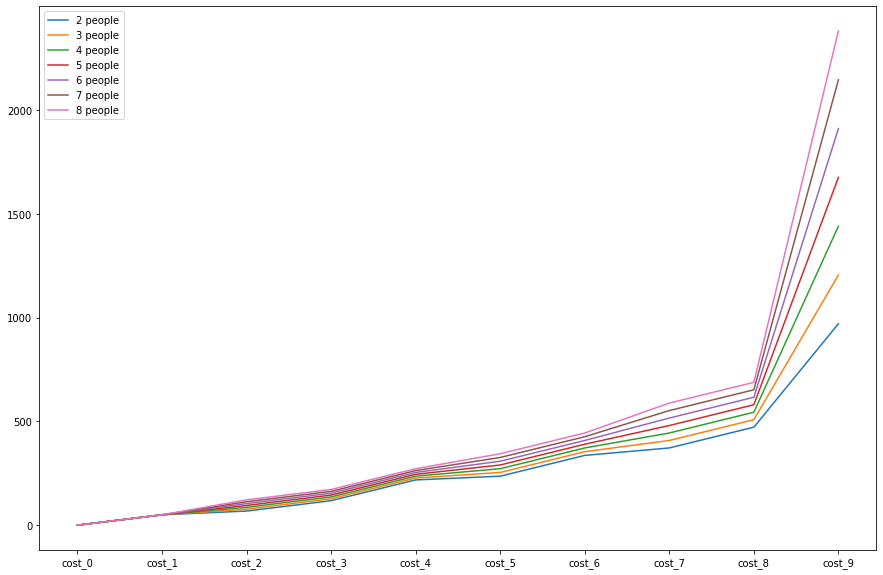

In [57]:
# Comparing the marginal increase of the costs by number of people and chosen date

plt.figure(figsize=(15,10))
plt.plot(n_2, label = '2 people')
plt.plot(n_3, label = '3 people')
plt.plot(n_4, label = '4 people')
plt.plot(n_5, label = '5 people')
plt.plot(n_6, label = '6 people')
plt.plot(n_7, label = '7 people')
plt.plot(n_8, label = '8 people')
plt.legend()
plt.show()